In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# reading data
path='/content/drive/MyDrive/y4s2/NLP/WA_Fn-UseC_-Telco-Customer-Churn.csv'
churn_data=pd.read_csv(path)
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# customer id is not important in this case so we drop it
churn_data.drop('customerID',axis=1,inplace=True)

In [5]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# conveting total charges to numeric values
pd.to_numeric(churn_data.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
# displaying rows where total charges is not a number
churn_data[pd.to_numeric(churn_data.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
# new data frame without null values in total charges
df=churn_data[churn_data.TotalCharges !=" "]
df.shape

(7032, 20)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# converting the values to integers after filtering
df.TotalCharges = pd.to_numeric(df.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df.TotalCharges.dtypes

dtype('float64')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


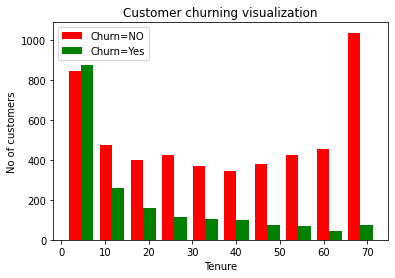

In [12]:
# some visualization of customers leaving and those staying based on their tenure
tenure_churn_no=df[df.Churn =="No"].tenure
tenure_churn_yes=df[df.Churn == "Yes"].tenure
plt.xlabel("Tenure")
plt.ylabel("No of customers")
plt.title("Customer churning visualization")
plt.hist([tenure_churn_no,tenure_churn_yes],color=["red","green"],label=["Churn=NO","Churn=Yes"])
plt.legend()

In [13]:
for column in df:
    if df[column].dtypes=='object':
        print(f'{column}  :  {df[column].unique()}')

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [14]:
# Bringing some uniformity to data (cleaning)
df.replace("No internet service","No",inplace=True)
df.replace("No phone service","No",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [15]:
df["TechSupport"].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
# columns with yes no values 
yes_no_cols=[]
for cols in df:
    if df[cols].unique().tolist()[0]=='Yes' or df[cols].unique().tolist()[1]=='Yes':
        yes_no_cols.append(cols)
# yes_no_cols
# replace yes with 1, no with 0
for col in yes_no_cols:
    df[col].replace({'Yes':1,'No':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
# replacing gender entries with 1's and 0's
df.gender.replace({'Female':1,'Male':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
df.gender.unique()

array([1, 0])

In [19]:
# do one hot encoding for the remaining columns...
df1=pd.get_dummies(data=df,columns=["InternetService","Contract","PaymentMethod"])

In [20]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [21]:
# columns whose values are greater than 1 and need to be scaled to values btn 0 and 1
cols_to_scale = ["tenure"]
for col in df1:
    if df1[col].dtype == 'float64':
        cols_to_scale.append(col)
cols_to_scale

['tenure', 'MonthlyCharges', 'TotalCharges']

In [22]:
# scaling the cols...
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [23]:
# data frame is now ready for use
features=[] #list of features to use for training
for col in df1:
    if col !="Churn":
        features.append(col)

X=df1[features]
# value to predict (whether customer will chrun or not)
y=df1["Churn"] 

In [24]:
# spliting the data
from sklearn.model_selection import train_test_split
trainX,X_test,trainy,y_test = train_test_split(X,y,test_size=0.15,random_state=1)
trainX.shape , trainy.shape
X_train,X_val,y_train,y_val =train_test_split(trainX,trainy, test_size=0.15,random_state=1)
trainX.shape,X_train.shape , trainy.shape ,y_train.shape

((5977, 26), (5080, 26), (5977,), (5080,))

In [25]:
print(f'Training data : {X_train.shape}')
print(f'Validating data : {X_val.shape}')
print(f'Testing data : {X_test.shape}')

Training data : (5080, 26)
Validating data : (897, 26)
Testing data : (1055, 26)


In [26]:
len(X_train.columns)

26

In [27]:
# creating the neural network
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
  keras.layers.Dense(20, input_shape=(26,),activation='relu'),
  keras.layers.Dense(15, activation='relu'),
  keras.layers.Dense(10,activation='relu'),
  keras.layers.Dense(5,activation='relu'),
  keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=40,validation_data=(X_val,y_val))

Epoch 1/40
159/159 [==============================] - 1s 3ms/step - loss: 0.5688 - accuracy: 0.6976 - val_loss: 0.4816 - val_accuracy: 0.7402
Epoch 2/40
159/159 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.7693 - val_loss: 0.4590 - val_accuracy: 0.7793
Epoch 3/40
159/159 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.7951 - val_loss: 0.4554 - val_accuracy: 0.7860
Epoch 4/40
159/159 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8014 - val_loss: 0.4561 - val_accuracy: 0.7848
Epoch 5/40
159/159 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8055 - val_loss: 0.4529 - val_accuracy: 0.7860
Epoch 6/40
159/159 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8071 - val_loss: 0.4545 - val_accuracy: 0.7893
Epoch 7/40
159/159 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8098 - val_loss: 0.4537 - val_accuracy: 0.7926
Epoch 

In [28]:
# evaluating the model with testing data
model.evaluate(X_test,y_test,verbose=0)

[0.4298083186149597, 0.7895734310150146]

In [29]:
# predicting churn values with the model using testing data
y_pred=model.predict(X_test)
y_pred[:5]

array([[0.0019148],
       [0.724737 ],
       [0.1280953],
       [0.745771 ],
       [0.5894564]], dtype=float32)

In [30]:
# converting the values to 1's and 0's
pred_churn=[]
for i in y_pred:
  if i >=0.5:
    pred_churn.append(1)
  else:
    pred_churn.append(0)

In [31]:
# converting the predictions back to yes and no
def to_yes_no(lst):
  newlst=[]
  for i in lst:
    if i==1:
      newlst.append("Yes")
    else:
      newlst.append("No ")
  return newlst

In [32]:
# predicting 1st ten values and comparing to last ten real values
print(f'First 10 predicted values from the testing data: {to_yes_no(pred_churn[:10])}')
print(f'First 10 real values from testing data:          {to_yes_no(y_test[:10].tolist())}')

First 10 predicted values from the testing data: ['No ', 'Yes', 'No ', 'Yes', 'Yes', 'Yes', 'No ', 'No ', 'No ', 'No ']
First 10 real values from testing data:          ['No ', 'Yes', 'No ', 'No ', 'Yes', 'No ', 'No ', 'Yes', 'No ', 'No ']


In [33]:
# predicting last ten values and comparing to last ten real values
print(f'Last 10 predicted values from the testing data: {to_yes_no(pred_churn[-10:])}')
print(f'Last 10 real values from testing data:          {to_yes_no(y_test[-10:].tolist())}')

Last 10 predicted values from the testing data: ['Yes', 'No ', 'No ', 'No ', 'Yes', 'No ', 'No ', 'Yes', 'Yes', 'Yes']
Last 10 real values from testing data:          ['Yes', 'Yes', 'Yes', 'No ', 'Yes', 'No ', 'No ', 'No ', 'No ', 'No ']


In [34]:
# accuracy measure
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_churn))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       788
           1       0.60      0.52      0.55       267

    accuracy                           0.79      1055
   macro avg       0.72      0.70      0.71      1055
weighted avg       0.78      0.79      0.78      1055

